In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
data = pd.read_csv('craigslistVehicles.csv')
data

,url,city,city_url,price,year,manufacturer,make,condition,cylinders,fuel,...,transmission,VIN,drive,size,type,paint_color,image_url,desc,lat,long
0,https://grandrapids.craigslist.org/cto/d/hasti...,"grand rapids, MI",https://grandrapids.craigslist.org,1500,2006.0,cadillac,cts,good,6 cylinders,gas,...,automatic,NaN,rwd,mid-size,coupe,blue,https://images.craigslist.org/00K0K_a9CZoZg2U8...,"2006 CtS Leather, Runs and drives Good.236k mil",42.643000,-85.293700
1,https://grandrapids.craigslist.org/cto/d/grand...,"grand rapids, MI",https://grandrapids.craigslist.org,8900,2009.0,lincoln,mkx,NaN,NaN,gas,...,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00a0a_9B4kPBDIWd...,"Selling our loaded 2009 Lincoln MKX with 119,0...",42.973700,-85.726500
2,https://grandrapids.craigslist.org/ctd/d/chesa...,"grand rapids, MI",https://grandrapids.craigslist.org,7995,2010.0,cadillac,srx premium collection,NaN,NaN,gas,...,automatic,3GYFNCEYXAS552363,NaN,NaN,NaN,NaN,https://images.craigslist.org/00X0X_8i0VRuk7Cv...,WE HAVE OVER 400 VEHICLES IN STOCK!\n\n View O...,43.186723,-84.163862
3,https://grandrapids.craigslist.org/ctd/d/chesa...,"grand rapids, MI",https://grandrapids.craigslist.org,6995,2007.0,NaN,hummer h3 4dr 4wd suv,NaN,NaN,gas,...,automatic,5GTDN13E478107380,NaN,NaN,NaN,NaN,https://images.craigslist.org/00b0b_ahkmUzr4cE...,WE HAVE OVER 400 VEHICLES IN STOCK!\n\n View O...,43.186723,-84.163862
4,https://grandrapids.craigslist.org/ctd/d/caled...,"grand rapids, MI",https://grandrapids.craigslist.org,20990,2010.0,ram,2500,excellent,6 cylinders,diesel,...,automatic,3D7UT2CL4AG113236,4wd,NaN,NaN,white,https://images.craigslist.org/00505_3DHY0kFrgb...,Great looking 2010 Ram 2500 ST w/6.7L 24V I6 4...,42.783714,-85.506777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525834,https://abilene.craigslist.org/cto/d/abilene-2...,"abilene, TX",https://abilene.craigslist.org,11000,2002.0,jeep,wrangler,excellent,6 cylinders,gas,...,manual,NaN,4wd,NaN,NaN,white,https://images.craigslist.org/00404_e7mDrpjXlj...,"2002 Jeep wrangler with 91,000 miles. Has seve...",32.401556,-99.884713
525835,https://abilene.craigslist.org/ctd/d/lubbock-2...,"abilene, TX",https://abilene.craigslist.org,6500,2012.0,nissan,rogue s awd,good,4 cylinders,gas,...,automatic,NaN,4wd,mid-size,SUV,white,https://images.craigslist.org/00U0U_8fAEYCFBB1...,"For sale is a clean, great running/driving 201...",33.526000,-101.833300
525836,https://abilene.craigslist.org/cto/d/abilene-2...,"abilene, TX",https://abilene.craigslist.org,3000,2005.0,ford,taurus,good,6 cylinders,gas,...,automatic,NaN,fwd,mid-size,sedan,white,https://images.craigslist.org/00f0f_1jDzkAAhC9...,For Sale By Owner \n2005 White Ford Taurus SEL...,32.579641,-99.663505
525837,https://abilene.craigslist.org/ctd/d/temple-su...,"abilene, TX",https://abilene.craigslist.org,8488,2011.0,honda,accord lx sedan,NaN,NaN,gas,...,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00C0C_fWL6kdm66i...,www.TEXASDIESELSTORE.com\n\nCALL OR TEXT TODAY...,31.071000,-97.389800


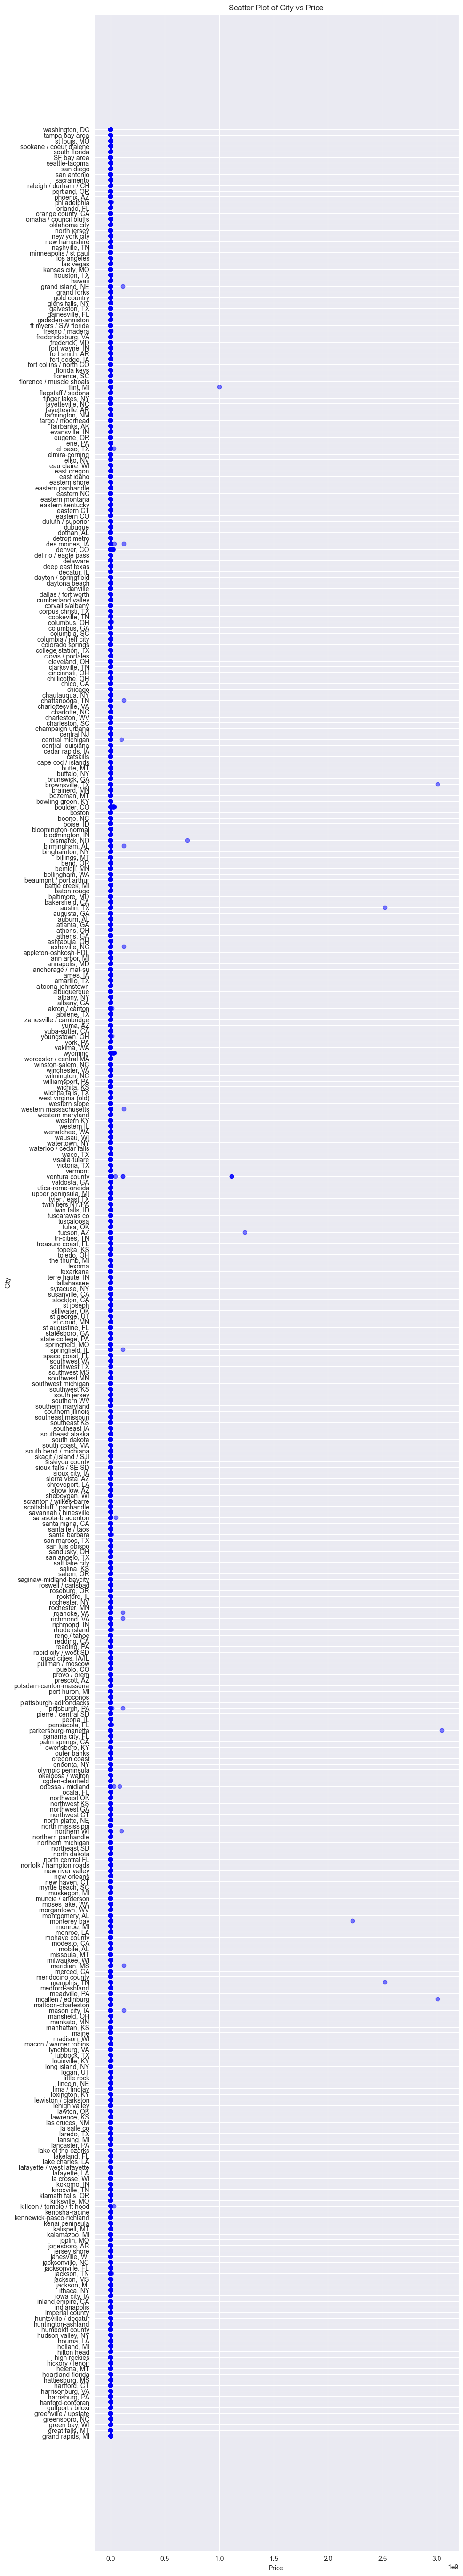

In [4]:
plt.figure(figsize=(10, 70))  # Adjust figsize as needed
plt.scatter(data['price'], data['city'], color='blue', alpha=0.5)
plt.title('Scatter Plot of City vs Price')
plt.xlabel('Price')
plt.ylabel('City')
plt.grid(True)
plt.show()

In [5]:
drop_columns = ['url', 'city','city_url', 'make', 'title_status', 'VIN', 'size', 'image_url', 'desc', 'lat','long']
train0 = data.drop(columns = drop_columns)
train0
#Dropping 'city' because the variation of price in relation to is very less.

#Dropping 'make' because every company manufacturer has a different name for their 'premium', 'regular' and 'legacy' models. The price is sure dependent on the make but if we want the model to take advantage of that we will have to encode the name of every make from every company separately, which is not feasible as of now.

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,1500,2006.0,cadillac,good,6 cylinders,gas,236000.0,automatic,rwd,coupe,blue
1,8900,2009.0,lincoln,NaN,NaN,gas,119000.0,automatic,NaN,NaN,NaN
2,7995,2010.0,cadillac,NaN,NaN,gas,129105.0,automatic,NaN,NaN,NaN
3,6995,2007.0,NaN,NaN,NaN,gas,164296.0,automatic,NaN,NaN,NaN
4,20990,2010.0,ram,excellent,6 cylinders,diesel,123213.0,automatic,4wd,NaN,white
...,...,...,...,...,...,...,...,...,...,...,...
525834,11000,2002.0,jeep,excellent,6 cylinders,gas,91000.0,manual,4wd,NaN,white
525835,6500,2012.0,nissan,good,4 cylinders,gas,99950.0,automatic,4wd,SUV,white
525836,3000,2005.0,ford,good,6 cylinders,gas,176567.0,automatic,fwd,sedan,white
525837,8488,2011.0,honda,NaN,NaN,gas,93219.0,automatic,NaN,NaN,NaN


In [6]:
numeric_columns = train0.select_dtypes(include='number')
numeric_columns


,price,year,odometer
0,1500,2006.0,236000.0
1,8900,2009.0,119000.0
2,7995,2010.0,129105.0
3,6995,2007.0,164296.0
4,20990,2010.0,123213.0
...,...,...,...
525834,11000,2002.0,91000.0
525835,6500,2012.0,99950.0
525836,3000,2005.0,176567.0
525837,8488,2011.0,93219.0


In [7]:
train0.info

<bound method DataFrame.info of         price    year manufacturer  condition    cylinders    fuel  odometer  \
0        1500  2006.0     cadillac       good  6 cylinders     gas  236000.0   
1        8900  2009.0      lincoln        NaN          NaN     gas  119000.0   
2        7995  2010.0     cadillac        NaN          NaN     gas  129105.0   
3        6995  2007.0          NaN        NaN          NaN     gas  164296.0   
4       20990  2010.0          ram  excellent  6 cylinders  diesel  123213.0   
...       ...     ...          ...        ...          ...     ...       ...   
525834  11000  2002.0         jeep  excellent  6 cylinders     gas   91000.0   
525835   6500  2012.0       nissan       good  4 cylinders     gas   99950.0   
525836   3000  2005.0         ford       good  6 cylinders     gas  176567.0   
525837   8488  2011.0        honda        NaN          NaN     gas   93219.0   
525838   6150  2011.0          NaN       good  4 cylinders     gas   78600.0   

       

In [8]:
temp = train0.isnull().sum()
temp

price                0
year              1440
manufacturer     24579
condition       245958
cylinders       210400
fuel              4295
odometer         98591
transmission      4267
drive           151364
type            148933
paint_color     171533
dtype: int64

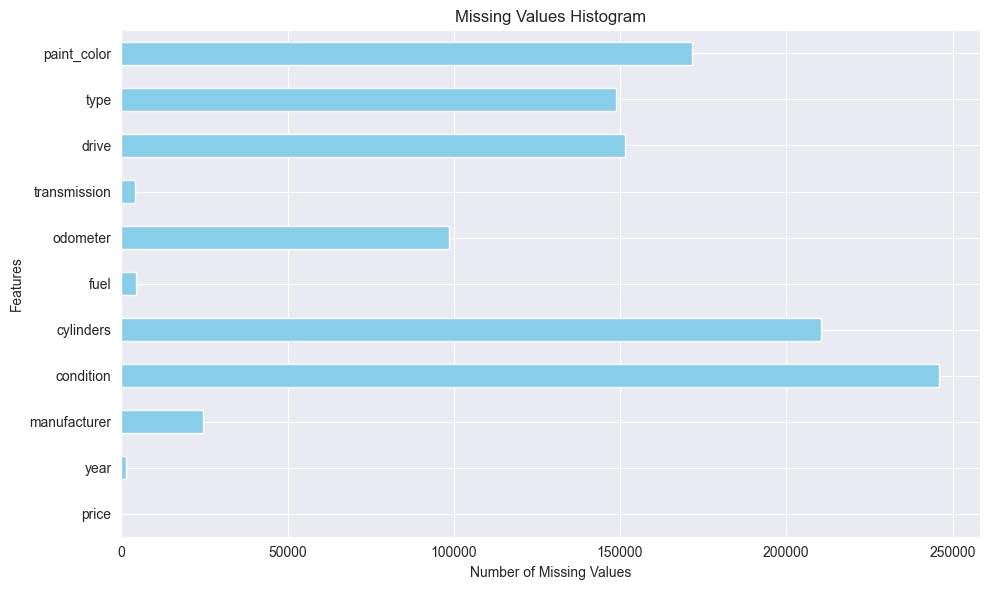

In [9]:
# Plot the histogram
temp.plot(kind='barh', color='skyblue', figsize=(10, 6))  # Adjust figsize as needed
plt.xlabel('Number of Missing Values')
plt.ylabel('Features')
plt.title('Missing Values Histogram')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


In [10]:
train0 = train0.dropna()
train0

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,1500,2006.0,cadillac,good,6 cylinders,gas,236000.0,automatic,rwd,coupe,blue
5,4950,2010.0,subaru,good,4 cylinders,gas,253000.0,automatic,4wd,sedan,white
6,6850,2007.0,gmc,good,8 cylinders,gas,254000.0,automatic,4wd,wagon,black
7,7995,2007.0,lexus,excellent,6 cylinders,gas,146111.0,automatic,fwd,sedan,white
8,4995,2011.0,hyundai,excellent,4 cylinders,gas,115048.0,automatic,fwd,sedan,blue
...,...,...,...,...,...,...,...,...,...,...,...
525829,3850,2005.0,ford,excellent,4 cylinders,gas,103000.0,automatic,fwd,sedan,brown
525830,4000,2005.0,toyota,good,4 cylinders,gas,54343.0,automatic,rwd,truck,black
525832,7000,2005.0,ford,excellent,8 cylinders,gas,150000.0,manual,rwd,coupe,black
525835,6500,2012.0,nissan,good,4 cylinders,gas,99950.0,automatic,4wd,SUV,white


In [11]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = train0.columns.values.tolist()
for col in features:
    if train0[col].dtype in numerics: continue
    categorical_columns.append(col)

for col in categorical_columns:
    if col in train0.columns:
        le = LabelEncoder()
        le.fit(list(train0[col].astype(str).values))
        train0[col] = le.transform(list(train0[col].astype(str).values))

In [12]:
train0['year'] = (train0['year']-1900).astype(int)
train0['odometer'] = train0['odometer'].astype(int)
train0

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,1500,106,6,2,5,2,236000,0,2,3,1
5,4950,110,36,2,3,2,253000,0,0,9,10
6,6850,107,14,2,6,2,254000,0,0,12,0
7,7995,107,23,0,5,2,146111,0,1,9,10
8,4995,111,17,0,3,2,115048,0,1,9,1
...,...,...,...,...,...,...,...,...,...,...,...
525829,3850,105,13,0,3,2,103000,0,1,9,2
525830,4000,105,37,2,3,2,54343,0,2,10,0
525832,7000,105,13,0,6,2,150000,1,2,3,0
525835,6500,112,30,2,3,2,99950,0,0,0,10


In [13]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144903 entries, 0 to 525836
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   price         144903 non-null  int64
 1   year          144903 non-null  int32
 2   manufacturer  144903 non-null  int32
 3   condition     144903 non-null  int32
 4   cylinders     144903 non-null  int32
 5   fuel          144903 non-null  int32
 6   odometer      144903 non-null  int32
 7   transmission  144903 non-null  int32
 8   drive         144903 non-null  int32
 9   type          144903 non-null  int32
 10  paint_color   144903 non-null  int32
dtypes: int32(10), int64(1)
memory usage: 7.7 MB


In [14]:
train0['price'].value_counts()

price
0        6755
1        1743
4500     1603
3500     1593
2500     1528
         ... 
12761       1
5445        1
25470       1
26810       1
3297        1
Name: count, Length: 6578, dtype: int64

In [15]:
train0 = train0[train0['price'] > 1000]
train0 = train0[train0['price'] < 40000]
# Rounded ['odometer'] to 5000
train0['odometer'] = train0['odometer'] // 5000
train0 = train0[train0['year'] > 110]

In [16]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61500 entries, 8 to 525835
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   price         61500 non-null  int64
 1   year          61500 non-null  int32
 2   manufacturer  61500 non-null  int32
 3   condition     61500 non-null  int32
 4   cylinders     61500 non-null  int32
 5   fuel          61500 non-null  int32
 6   odometer      61500 non-null  int32
 7   transmission  61500 non-null  int32
 8   drive         61500 non-null  int32
 9   type          61500 non-null  int32
 10  paint_color   61500 non-null  int32
dtypes: int32(10), int64(1)
memory usage: 3.3 MB


In [17]:
correlation = train0.corr()
correlation

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
price,1.000000,0.458124,-0.024179,0.061167,0.531244,-0.208566,-0.184752,0.105238,-0.267012,0.061335,0.030263
year,0.458124,1.000000,0.045498,0.111609,-0.078526,0.069939,-0.296953,0.036089,0.010158,0.026916,0.040059
manufacturer,-0.024179,0.045498,1.000000,-0.009447,-0.201032,-0.065246,-0.021403,0.026844,-0.101821,0.026859,-0.003125
condition,0.061167,0.111609,-0.009447,1.000000,0.016719,0.038039,-0.054486,0.121792,0.061101,0.028917,0.022872
cylinders,0.531244,-0.078526,-0.201032,0.016719,1.000000,-0.109350,0.066435,0.052527,-0.153713,0.096659,0.037153
fuel,-0.208566,0.069939,-0.065246,0.038039,-0.109350,1.000000,-0.089144,0.068673,0.096037,-0.132572,-0.042783
odometer,-0.184752,-0.296953,-0.021403,-0.054486,0.066435,-0.089144,1.000000,-0.074429,-0.046763,0.020417,0.022202
transmission,0.105238,0.036089,0.026844,0.121792,0.052527,0.068673,-0.074429,1.000000,0.064781,-0.007124,-0.026939
drive,-0.267012,0.010158,-0.101821,0.061101,-0.153713,0.096037,-0.046763,0.064781,1.000000,0.118371,0.073252
type,0.061335,0.026916,0.026859,0.028917,0.096659,-0.132572,0.020417,-0.007124,0.118371,1.000000,0.069675


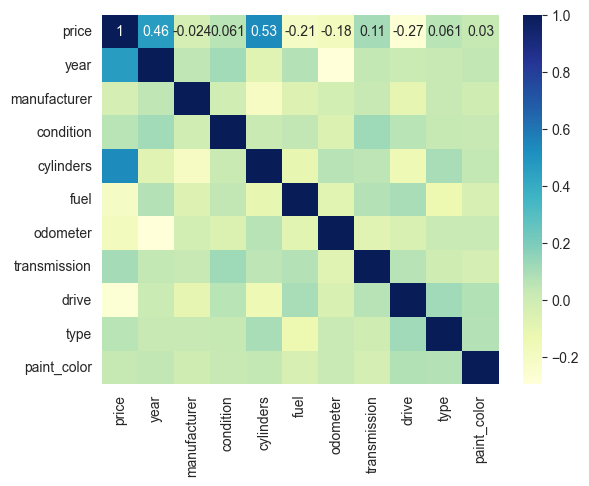

In [18]:
sns.heatmap(correlation,cmap='YlGnBu',annot=True)
plt.show()

In [19]:
train0.describe()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
count,61500.000000,61500.000000,61500.000000,61500.000000,61500.000000,61500.000000,61500.000000,61500.000000,61500.000000,61500.000000,61500.000000
mean,16753.402407,114.093057,18.171024,1.037512,4.452244,1.915122,16.275382,0.117220,0.687545,6.161366,5.612894
std,8634.636138,2.198127,10.783879,1.227185,1.273357,0.509889,18.522399,0.423922,0.726215,4.185255,4.075558
min,1025.000000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9900.000000,112.000000,10.000000,0.000000,3.000000,2.000000,9.000000,0.000000,0.000000,0.000000,1.000000
50%,14997.000000,114.000000,14.000000,0.000000,5.000000,2.000000,15.000000,0.000000,1.000000,8.000000,7.000000
75%,22500.000000,116.000000,30.000000,2.000000,6.000000,2.000000,22.000000,0.000000,1.000000,9.000000,10.000000
max,39999.000000,120.000000,39.000000,5.000000,7.000000,4.000000,1926.000000,2.000000,2.000000,12.000000,11.000000


# Preparation for training

In [20]:
target_name = 'price'
train_target0 = train0[target_name]
train0 = train0.drop([target_name], axis=1)

In [21]:
train0, test0, train_target0, test_target0 = train_test_split(train0, train_target0, test_size=0.2, random_state=0)

In [22]:
scaler = StandardScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)

In [23]:
train0

,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,0.863012,1.738647,-0.847094,0.427812,0.165521,-0.469822,-0.277197,-0.946534,0.914222,0.830914
1,0.408926,0.627842,1.595253,-1.141380,0.165521,-0.266986,-0.277197,-0.946534,-1.478710,0.585384
2,-1.407417,1.923781,-0.847094,-0.356784,0.165521,0.392231,-0.277197,0.429470,-1.000124,0.585384
3,1.317098,-0.482963,-0.847094,0.427812,0.165521,-0.469822,-0.277197,0.429470,1.392808,1.076444
4,0.408926,-1.038365,1.595253,1.212408,0.165521,-0.216277,-0.277197,-0.946534,0.914222,-1.133325
...,...,...,...,...,...,...,...,...,...,...
49195,-0.953331,0.257573,-0.847094,0.427812,0.165521,-0.317695,-0.277197,0.429470,-0.282244,0.830914
49196,2.225269,-1.038365,1.595253,1.212408,0.165521,-0.621949,-0.277197,1.805474,1.153515,1.076444
49197,-0.045159,-0.482963,-0.847094,1.212408,0.165521,-0.419113,2.071770,1.805474,-0.760831,0.585384
49198,0.863012,-0.482963,-0.847094,-1.141380,0.165521,-0.571240,-0.277197,0.429470,0.674928,0.830914


In [24]:
train_target0

327675    30999
441383    16997
316079     5600
331323    23750
121636    39995
          ...  
386750     9995
444263    26017
360745    22500
367265     9200
22266     11995
Name: price, Length: 49200, dtype: int64

In [25]:
train, test, target, target_test = train_test_split(train0, train_target0, test_size=0.3, random_state=100)

In [26]:
train

,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
32364,0.863012,0.442708,1.595253,-1.141380,0.165521,-0.469822,-0.277197,1.805474,0.674928,-1.133325
10147,-1.407417,-1.130932,-0.847094,1.212408,0.165521,-0.469822,-0.277197,1.805474,0.674928,1.076444
46022,-0.499245,-0.482963,0.781138,-1.141380,0.165521,0.341522,-0.277197,1.805474,-0.521538,-1.378855
25496,1.771184,-0.390396,1.595253,1.212408,0.165521,-0.165568,-0.277197,-0.946534,0.914222,0.585384
28074,1.317098,1.738647,0.781138,0.427812,0.165521,-0.672658,4.420737,-0.946534,0.435635,0.830914
...,...,...,...,...,...,...,...,...,...,...
16304,-1.407417,-0.482963,1.595253,0.427812,0.165521,-0.114859,-0.277197,-0.946534,1.392808,-1.378855
79,-1.407417,0.720409,-0.847094,0.427812,0.165521,0.087977,-0.277197,1.805474,0.674928,-1.378855
12119,1.771184,1.090677,-0.847094,1.997004,-1.805826,-0.672658,-0.277197,0.429470,-0.521538,-1.378855
14147,-0.953331,1.738647,-0.847094,0.427812,0.165521,0.189395,-0.277197,-0.946534,0.914222,1.076444


In [27]:
test

,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
27224,0.408926,1.738647,-0.847094,0.427812,0.165521,-0.419113,-0.277197,0.429470,0.674928,-1.133325
32703,0.408926,-1.038365,1.595253,1.212408,0.165521,0.138686,-0.277197,-0.946534,0.435635,0.830914
18690,-0.499245,-1.038365,0.781138,-1.141380,0.165521,0.037268,-0.277197,0.429470,0.674928,1.076444
22035,0.408926,-0.205262,-0.847094,-1.141380,0.165521,-0.469822,-0.277197,-0.946534,-0.521538,1.076444
17540,0.863012,-0.482963,0.781138,0.427812,0.165521,-0.317695,4.420737,-0.946534,0.435635,1.076444
...,...,...,...,...,...,...,...,...,...,...
32254,0.408926,-0.482963,0.781138,1.212408,0.165521,-0.621949,4.420737,1.805474,-0.760831,1.321974
6892,-0.499245,-0.482963,0.781138,-1.141380,0.165521,-0.419113,-0.277197,0.429470,-0.521538,0.830914
48992,0.863012,-1.038365,-0.847094,1.212408,0.165521,0.392231,-0.277197,-0.946534,0.914222,0.830914
26320,-0.499245,0.720409,1.595253,0.427812,0.165521,-0.064150,-0.277197,-0.946534,0.674928,1.076444


In [28]:
train.info

<bound method DataFrame.info of            year  manufacturer  condition  cylinders      fuel  odometer  \
32364  0.863012      0.442708   1.595253  -1.141380  0.165521 -0.469822   
10147 -1.407417     -1.130932  -0.847094   1.212408  0.165521 -0.469822   
46022 -0.499245     -0.482963   0.781138  -1.141380  0.165521  0.341522   
25496  1.771184     -0.390396   1.595253   1.212408  0.165521 -0.165568   
28074  1.317098      1.738647   0.781138   0.427812  0.165521 -0.672658   
...         ...           ...        ...        ...       ...       ...   
16304 -1.407417     -0.482963   1.595253   0.427812  0.165521 -0.114859   
79    -1.407417      0.720409  -0.847094   0.427812  0.165521  0.087977   
12119  1.771184      1.090677  -0.847094   1.997004 -1.805826 -0.672658   
14147 -0.953331      1.738647  -0.847094   0.427812  0.165521  0.189395   
38408  0.863012     -1.408634   1.595253  -1.141380  2.136869 -0.368404   

       transmission     drive      type  paint_color  
32364     -0

In [29]:
target.info

<bound method Series.info of 47658     23431
321593    12990
443975     4995
174957    34975
134176    31700
          ...  
195454    12999
428599    10488
8930      20695
7701      21975
8981      19500
Name: price, Length: 34440, dtype: int64>

In [30]:
test.info

<bound method DataFrame.info of            year  manufacturer  condition  cylinders      fuel  odometer  \
27224  0.408926      1.738647  -0.847094   0.427812  0.165521 -0.419113   
32703  0.408926     -1.038365   1.595253   1.212408  0.165521  0.138686   
18690 -0.499245     -1.038365   0.781138  -1.141380  0.165521  0.037268   
22035  0.408926     -0.205262  -0.847094  -1.141380  0.165521 -0.469822   
17540  0.863012     -0.482963   0.781138   0.427812  0.165521 -0.317695   
...         ...           ...        ...        ...       ...       ...   
32254  0.408926     -0.482963   0.781138   1.212408  0.165521 -0.621949   
6892  -0.499245     -0.482963   0.781138  -1.141380  0.165521 -0.419113   
48992  0.863012     -1.038365  -0.847094   1.212408  0.165521  0.392231   
26320 -0.499245      0.720409   1.595253   0.427812  0.165521 -0.064150   
42722 -0.045159      0.905543  -0.847094  -1.141380  0.165521 -0.064150   

       transmission     drive      type  paint_color  
27224     -0

In [31]:
target_test.info

<bound method Series.info of 194161    20995
285335    21900
375452     4895
54956     21000
201334    39400
          ...  
177917    26100
314505     6395
449573    17950
183584    16500
431916    12900
Name: price, Length: 14760, dtype: int64>

In [32]:
acc_train_r2 = []
acc_test_r2 = []
acc_train_d = []
acc_test_d = []
acc_train_rmse = []
acc_test_rmse = []

In [33]:
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return mean_squared_error(y_meas, y_pred,squared=False)

In [34]:
def acc_model(num,model,train,test):
    # Calculation of accuracy of model акщь Sklearn by different metrics   
  
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    ytrain = model.predict(train)  
    ytest = model.predict(test)

    print('target = ', target[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(target, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(target, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(target, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_test[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_test, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_test, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_test, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

# Linear_Regression

In [35]:
linreg = LinearRegression()
linreg.fit(train, target)
acc_model(0,linreg,train,test)

target =  [23431 12990  4995 34975 31700]
ytrain =  [12292.16842153 13119.1889548   5916.9811224  30839.12276342
 29302.90746999]
acc(r2_score) for train = 60.85
acc(relative error) for train = 24.25
acc(rmse) for train = 540489.52
target_test = [20995 21900  4895 21000 39400]
ytest = [19901.77520231 24764.52086806  8149.03129652 14706.19207873
 26763.6584576 ]
acc(r2_score) for test = 61.37
acc(relative error) for test = 24.22
acc(rmse) for test = 535444.5


# Decision Tree Regressor

In [36]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(train, target)
acc_model(2,decision_tree,train,test)

target =  [23431 12990  4995 34975 31700]
ytrain =  [23431. 12990.  4995. 34975. 31700.]
acc(r2_score) for train = 99.35
acc(relative error) for train = 0.92
acc(rmse) for train = 69407.01
target_test = [20995 21900  4895 21000 39400]
ytest = [24500. 23995.  6000. 13997. 32800.]
acc(r2_score) for test = 76.24
acc(relative error) for test = 14.52
acc(rmse) for test = 419927.98


# Random Forest Regressor

In [37]:
random_forest = RandomForestRegressor()
random_forest.fit(train, target)
acc_model(3,random_forest,train,test)

target =  [23431 12990  4995 34975 31700]
ytrain =  [22467.64 18540.62  5640.06 34874.25 31700.  ]
acc(r2_score) for train = 97.58
acc(relative error) for train = 4.91
acc(rmse) for train = 134326.96
target_test = [20995 21900  4895 21000 39400]
ytest = [19326.03       22552.37        8192.647      17694.68333333
 31995.03188095]
acc(r2_score) for test = 85.67
acc(relative error) for test = 12.26
acc(rmse) for test = 326081.64


# Support Vector Machines

In [38]:
svr = SVR()
svr.fit(train, target)
acc_model(1,svr,train,test)
# This takes a long time to execute

target =  [23431 12990  4995 34975 31700]
ytrain =  [14650.16823065 15064.76789981 13525.87339582 17429.60576833
 16410.76520146]
acc(r2_score) for train = 15.3
acc(relative error) for train = 37.03
acc(rmse) for train = 795035.87
target_test = [20995 21900  4895 21000 39400]
ytest = [15452.6048884  16816.07556209 13500.67643963 14860.83303216
 16462.69278573]
acc(r2_score) for test = 15.73
acc(relative error) for test = 36.94
acc(rmse) for test = 790878.92
